In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.fft import *
from scipy.io import wavfile

from playsound import playsound

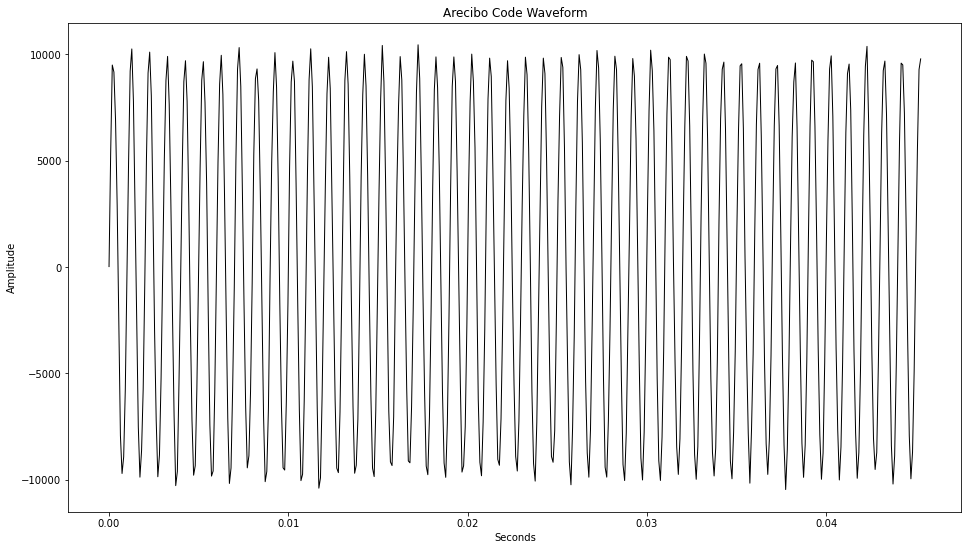

In [2]:
# Load the message
sr, data = wavfile.read("The_Arecibo_Message.wav")

fig, ax = plt.subplots(figsize=(16,9))
plt.plot(np.linspace(0, 
                     len(data)/sr, 
                     len(data))[:500], 
         data[:500], 
         linewidth = 1, 
         color = 'k')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")
plt.title("Arecibo Code Waveform")
plt.show()

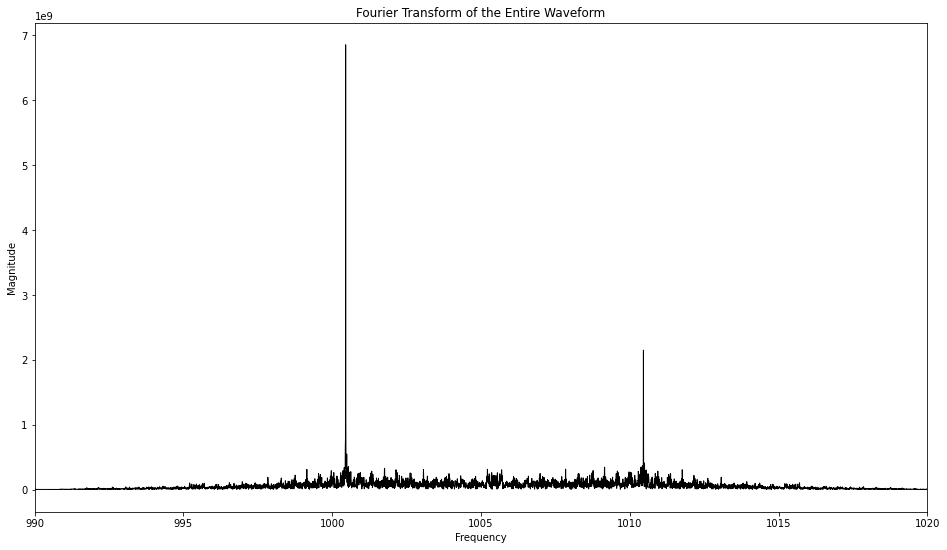

In [3]:
n = len(data)
yf = rfft(data)
xf = rfftfreq(n, 1 / sr)

fig, ax = plt.subplots(figsize=(16,9))

plt.plot(xf, 
         abs(yf), 
         linewidth = 1, 
         color = 'k')
plt.xlim(990, 1020)
plt.title("Fourier Transform of the Entire Waveform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [4]:
# Building a function to find the frequency of slices of the waveform
def freq(data, sample_rate, start_time, end_time):
    
    data = data[start_time:end_time]
    n = len(data)
    yf = rfft(data)
    xf = rfftfreq(n, 1 / sample_rate)
    
    # Get the index of the largest value in the fourier series
    idx = np.argmax(np.abs(yf))
    
    # Get the frequency at that index
    freq = xf[idx]
    return freq

In [5]:
# Slicing the waveform into 1679 pieces
slices = np.linspace(0, len(data), num = 73 * 23 + 2)

freqs = []
for i in range(1679):
    freqs.append(freq(data = data, 
                      sample_rate=sr, 
                      start_time = int(slices[i]), 
                      end_time = int(slices[i+1])))

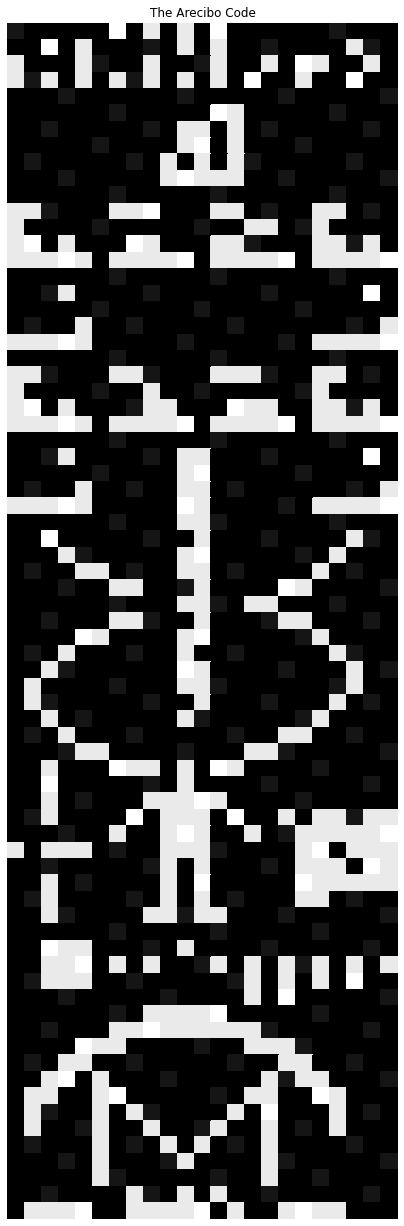

In [6]:
fig, ax = plt.subplots(figsize=(7,22))
sns.heatmap(np.array(freqs).reshape(73,23), cmap='gray', ax = ax, cbar = False)
ax.axes.yaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)
plt.title("The Arecibo Code")
plt.show()

Text(0.5, 1.0, 'Transposing the Data')

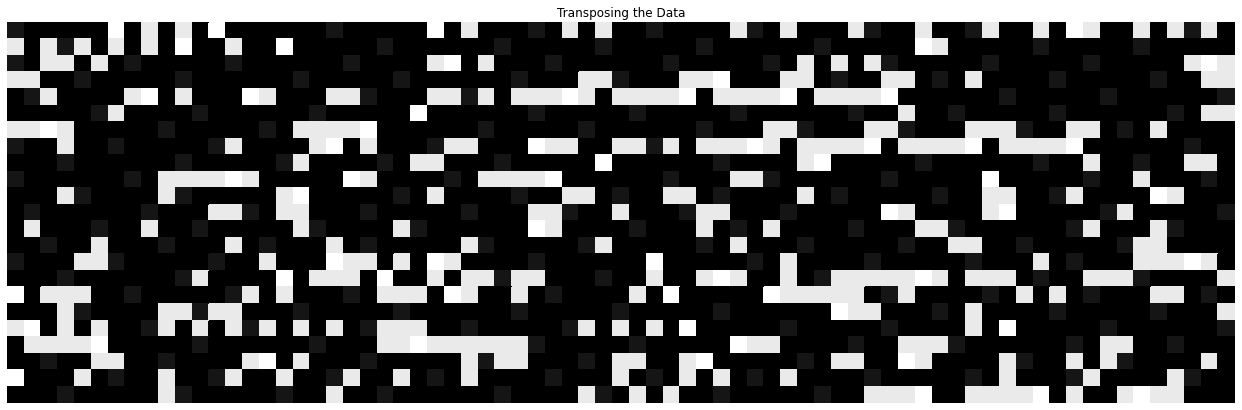

In [7]:
fig, ax = plt.subplots(figsize=(22,7))
sns.heatmap(np.array(freqs).reshape(23,73), cmap='gray', ax = ax, cbar=False)
ax.axes.yaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)
plt.title("Transposing the Data")